<a href="https://colab.research.google.com/github/detayans/Hand_writting_recognition_project/blob/main/Hand_writting_recognition_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist 

(trainsetX, trainsety),(testsetX,testsety) = mnist.load_data()

print('Train: X = {}, y = {}'.format(trainsetX.shape, trainsety.shape)) 
print('Test: X = {}, y = {}'.format(testsetX.shape, testsety.shape))

11501568/11490434 [==============================] - 0s 0us/step
Train: X = (60000, 28, 28), y = (60000,)
Test: X = (10000, 28, 28), y = (10000,)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf


In [3]:
print (trainsetX[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [4]:
img_shape = trainsetX.shape[1:]
print(img_shape)

(28, 28)


In [5]:
trainX = trainsetX.astype('float32')/255.0

In [11]:
trainX[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [6]:
testX = testsetX.astype('float32')/255.0

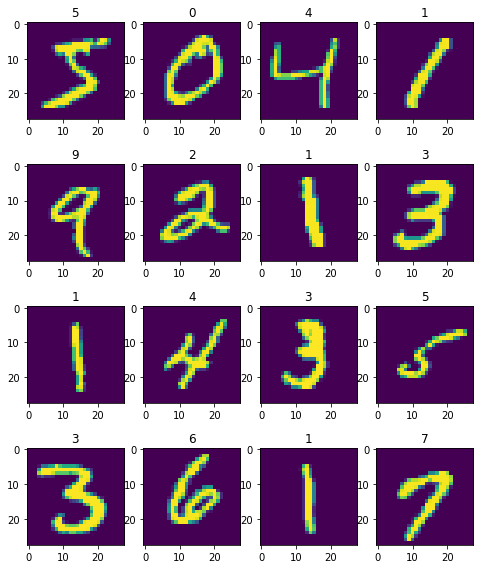

In [7]:
plt.figure(figsize=(8,10))
for i in range (16):
  plt.subplot(4,4,i+1)
  plt.imshow(trainX[i])
  plt.title(trainsety[i])
plt.show() 


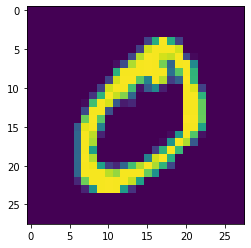

In [8]:
plt.imshow(trainX[1])

#Model Building

In [9]:
data = tf.keras.Sequential()
data.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
data.add(tf.keras.layers.MaxPool2D((2,2)))
data.add(tf.keras.layers.Conv2D(filters=48,kernel_size=3,activation='relu'))
data.add(tf.keras.layers.MaxPool2D((2,2)))
data.add(tf.keras.layers.Dropout(0.5))
data.add(tf.keras.layers.Flatten())
data.add(tf.keras.layers.Dense(units=500, activation='relu'))
data.add(tf.keras.layers.Dense(units=10, activation='softmax'))


In [10]:
data.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

In [12]:
data.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [13]:
data2 = data.fit(trainX,trainsety, epochs=10,batch_size=128,verbose=2,validation_split=0.1)

Epoch 1/10
422/422 - 41s - loss: 0.2475 - accuracy: 0.9242 - val_loss: 0.0558 - val_accuracy: 0.9842 - 41s/epoch - 97ms/step
Epoch 2/10
422/422 - 40s - loss: 0.0786 - accuracy: 0.9759 - val_loss: 0.0416 - val_accuracy: 0.9883 - 40s/epoch - 94ms/step
Epoch 3/10
422/422 - 40s - loss: 0.0587 - accuracy: 0.9812 - val_loss: 0.0357 - val_accuracy: 0.9893 - 40s/epoch - 95ms/step
Epoch 4/10
422/422 - 39s - loss: 0.0483 - accuracy: 0.9842 - val_loss: 0.0364 - val_accuracy: 0.9892 - 39s/epoch - 93ms/step
Epoch 5/10
422/422 - 39s - loss: 0.0417 - accuracy: 0.9868 - val_loss: 0.0299 - val_accuracy: 0.9905 - 39s/epoch - 94ms/step
Epoch 6/10
422/422 - 40s - loss: 0.0359 - accuracy: 0.9881 - val_loss: 0.0246 - val_accuracy: 0.9945 - 40s/epoch - 95ms/step
Epoch 7/10
422/422 - 39s - loss: 0.0310 - accuracy: 0.9900 - val_loss: 0.0282 - val_accuracy: 0.9917 - 39s/epoch - 93ms/step
Epoch 8/10
422/422 - 39s - loss: 0.0286 - accuracy: 0.9910 - val_loss: 0.0331 - val_accuracy: 0.9910 - 39s/epoch - 93ms/step


In [14]:
loss,accuracy=data.evaluate(testX,testsety)

313/313 [==============================] - 3s 11ms/step - loss: 0.0270 - accuracy: 0.9920


Model Prediction Is:  4


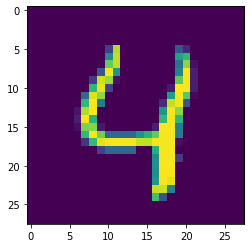

In [15]:
plt.imshow(testX[4])
pred=data.predict(testX)
print("Model Prediction Is: ",np.argmax(pred[4]))

Model Prediction Is:  5


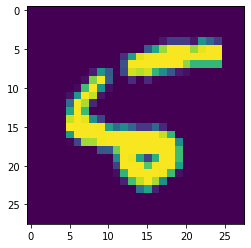

In [16]:
plt.imshow(testX[8])
pred=data.predict(testX)
print("Model Prediction Is: ",np.argmax(pred[8]))

Model Prediction Is:  7


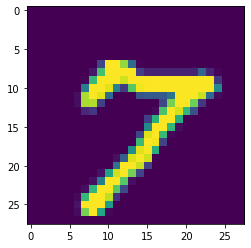

In [17]:
plt.imshow(testX[9000])
pred=data.predict(testX)
print("Model Prediction Is: ",np.argmax(pred[9000]))